In [20]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
data = pd.read_csv("https://raw.githubusercontent.com/LuisSante/Datasets/main/Anemia/HIS%20Ni%C3%B1os%202019/HB/Ni%C3%B1os%20AREQUIPA.csv")
data.head()

,Diresa,Red,Microred,EESS,Renipress,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,...,Cred,Suplementacion,Consejeria,Sesion,DEPARTAMENTO,PROVINCIA,DISTRITO,ALTITUD,HBC,Dx_Anemia
0,AREQUIPA,CASTILLA CONDESUYOS - LA UNION,VIRACO,I-1 - 00001400 - PUESTO DE SALUD TIPAN,1400,2/3/2019,M,2/3/2015,48,40411.0,...,1,0,0,0,AREQUIPA,CASTILLA,TIPAN,1913,11.525253,Normal
1,AREQUIPA,CASTILLA CONDESUYOS - LA UNION,VIRACO,I-1 - 00001401 - PUESTO DE SALUD TAGRE,1401,4/24/2019,M,4/21/2015,48,40411.0,...,1,1,0,0,AREQUIPA,CASTILLA,TIPAN,1913,11.325253,Normal
2,AREQUIPA,CASTILLA CONDESUYOS - LA UNION,VIRACO,I-1 - 00001400 - PUESTO DE SALUD TIPAN,1400,3/24/2019,F,3/24/2015,48,40411.0,...,1,0,0,0,AREQUIPA,CASTILLA,TIPAN,1913,12.225253,Normal
3,AREQUIPA,CASTILLA CONDESUYOS - LA UNION,VIRACO,I-2 - 00001403 - PUESTO DE SALUD UÑON,1403,3/26/2019,F,2/21/2015,49,40412.0,...,0,0,0,0,AREQUIPA,CASTILLA,UÑON,2782,10.939544,Anemia Leve
4,AREQUIPA,CASTILLA CONDESUYOS - LA UNION,VIRACO,I-2 - 00001403 - PUESTO DE SALUD UÑON,1403,3/9/2019,F,8/7/2015,43,40412.0,...,0,0,0,0,AREQUIPA,CASTILLA,UÑON,2782,12.239544,Normal


In [22]:
data = data[['Sexo', 'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'ALTITUD', 'Dx_Anemia']]
data.head()

,Sexo,Qaliwarma,Peso,Talla,Hemoglobina,ALTITUD,Dx_Anemia
0,M,0,20.2,10.2,12.2,1913,Normal
1,M,0,,,12.0,1913,Normal
2,F,0,15.3,94.9,12.9,1913,Normal
3,F,0,,,12.5,2782,Anemia Leve
4,F,0,,,13.8,2782,Normal


In [23]:
print(data['Sexo'].mode())

data['Sexo'] = data['Sexo'].replace(np.nan, 'M')
l = []
for i in data['Sexo']:
  l.append(i)
print(list(set(l)))

data['Sexo'] = data['Sexo'].map( {'F': 1, 'M': 0} ).astype(int)
print(data.head())

0    M
Name: Sexo, dtype: object
['M', 'F']
   Sexo  Qaliwarma  Peso Talla  Hemoglobina  ALTITUD    Dx_Anemia
0     0          0  20.2  10.2         12.2     1913       Normal
1     0          0                     12.0     1913       Normal
2     1          0  15.3  94.9         12.9     1913       Normal
3     1          0                     12.5     2782  Anemia Leve
4     1          0                     13.8     2782       Normal


In [24]:
a = data['Dx_Anemia']
dx = []
for i in a:
  dx.append(i)
dx = list(set(dx))

dx

['Normal', 'Anemia Leve', 'Anemia Severa', 'Anemia Moderada']

In [36]:
data['Peso'] = data['Peso'].replace(' ', 'nan').astype('float32')
data['Talla'] = data['Talla'].replace(' ', 'nan').astype('float32')
data['Peso'] = data['Peso'].fillna(data['Peso'].mean())
data['Talla'] = data['Talla'].fillna(data['Talla'].mean())

data['Dx_Anemia'] = data['Dx_Anemia'].map({'Normal': 0, 'Anemia Leve': 1, 'Anemia Moderada': 2, 'Anemia Severa': 3, np.nan: data['Dx_Anemia'].mode()}) 

data.head()

,Sexo,Qaliwarma,Peso,Talla,Hemoglobina,ALTITUD,Dx_Anemia
0,0,0,20.200001,10.200000,12.2,1913,NaN
1,0,0,13.284772,83.370277,12.0,1913,NaN
2,1,0,15.300000,94.900002,12.9,1913,NaN
3,1,0,13.284772,83.370277,12.5,2782,NaN
4,1,0,13.284772,83.370277,13.8,2782,NaN


In [39]:
for c in data:
  data[c] = data[c].fillna(data[c].mean())

# Matriz de Correlación

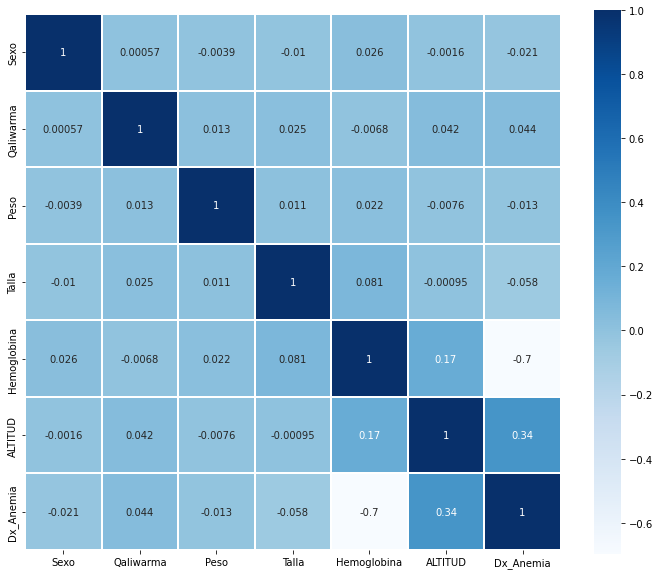

,Sexo,Qaliwarma,Peso,Talla,Hemoglobina,ALTITUD,Dx_Anemia
0,0.0,0.0,20.200001,10.200000,12.2,1913.0,0.0
1,0.0,0.0,13.284772,83.370277,12.0,1913.0,0.0
2,1.0,0.0,15.300000,94.900002,12.9,1913.0,0.0
3,1.0,0.0,13.284772,83.370277,12.5,2782.0,1.0
4,1.0,0.0,13.284772,83.370277,13.8,2782.0,0.0
...,...,...,...,...,...,...,...
30401,0.0,0.0,9.700000,80.500000,12.0,2250.0,0.0
30402,0.0,0.0,9.600000,69.000000,14.2,2406.0,0.0
30403,0.0,0.0,7.800000,67.400002,13.8,2406.0,0.0
30404,0.0,0.0,9.000000,70.800003,12.7,2403.0,0.0


In [27]:
matriz = data.copy()
matriz.loc['Dx_Anemia'] = matriz['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})
plt.figure(figsize=(12, 10))
corr = matriz.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show()
matriz

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

y = data[['Dx_Anemia']]
X = data.drop('Dx_Anemia', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
# # Fit the model
linear_model.fit(X_train, y_train)
line_y_linear = linear_model.predict(X_test)

In [30]:
linear_test_pred = linear_model.predict(X_test)
linear_train_pred = linear_model.predict(X_train)

<AxesSubplot:xlabel='Dx_Anemia'>

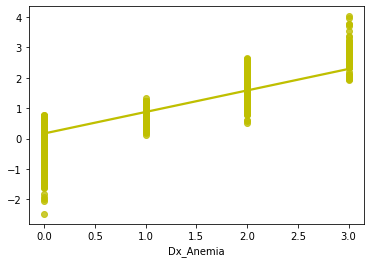

In [31]:
sns.regplot(x=y_test, y=line_y_linear, ci=None, color="y", scatter=True)

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.predict(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
labels = pd.Series(kmeans.labels_, name="class")
X.join(labels)

[0 0 0 ... 0 0 0]
[[4.90179140e-01 5.45603346e-03 1.32842090e+01 8.32098788e+01
  1.23551587e+01 2.39463622e+03]
 [4.94129159e-01 1.00293542e-02 1.36015752e+01 8.40180214e+01
  1.17097407e+01 1.52999266e+02]
 [4.96749522e-01 3.93881453e-02 1.31075106e+01 8.44773943e+01
  1.23041644e+01 3.69642524e+03]
 [4.98829040e-01 1.11241218e-02 1.28051778e+01 8.21903784e+01
  1.19898302e+01 1.34178337e+03]]


,Sexo,Qaliwarma,Peso,Talla,Hemoglobina,ALTITUD,class
0,0,0,20.200001,10.200000,12.2,1913,0
1,0,0,13.284772,83.370277,12.0,1913,0
2,1,0,15.300000,94.900002,12.9,1913,0
3,1,0,13.284772,83.370277,12.5,2782,0
4,1,0,13.284772,83.370277,13.8,2782,0
...,...,...,...,...,...,...,...
30400,0,0,8.300000,68.800003,11.4,15,1
30401,0,0,9.700000,80.500000,12.0,2250,0
30402,0,0,9.600000,69.000000,14.2,2406,0
30403,0,0,7.800000,67.400002,13.8,2406,0


c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


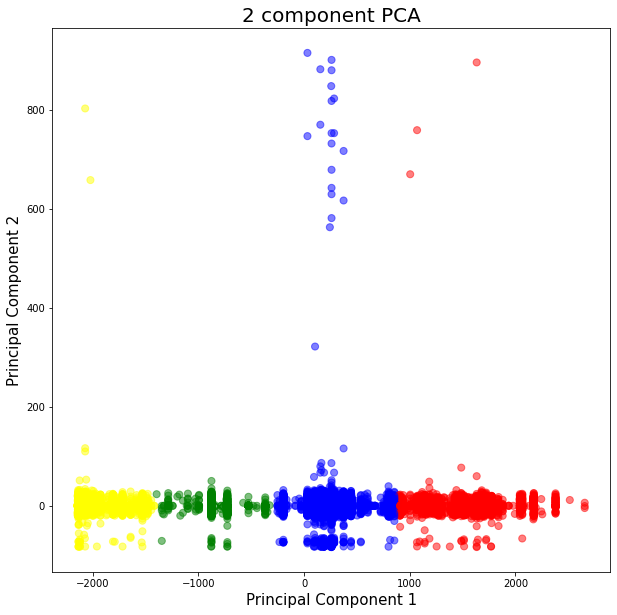

In [33]:
from sklearn.decomposition import PCA

numClusters= 4
kmeans = KMeans(n_clusters=numClusters).fit(X)
centroids = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

#transform n variiables to 2 principal components to plot
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents
         , columns = ['principal component 1', 'principal component 2'])

colors =['red','green','blue','yellow']
centroidColor= []
for item in range(numClusters):
  centroidColor.append(colors[item])

dataPointColor=[]
for row in labels:
  dataPointColor.append(colors[row])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 
c=dataPointColor, s=50, alpha=0.5)

C_transformed = pca_fit.transform(C)
plt.scatter(C_transformed[:, 0], C_transformed[:, 1], c=centroidColor, s=200, marker=('x'))
plt.show()

# Qaliwarma affects anemia cases?

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7004\2000632484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


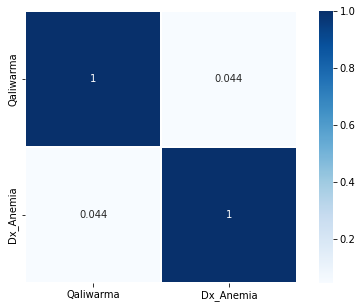

In [35]:
QW_data = data[['Qaliwarma', 'Dx_Anemia']]
QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = QW_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 